In [1]:
# Change your Directory accordingly
import os
os.chdir("D:/Nova/T3/Machine_Learning/Group_Asssignment/Air-Quality-Forecast")

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score

#from scipy.stats import mode

# Table of Contents

- 1. [Data Import](#1-data-import)
- 2. [Exploartory Data Analysis](#2-exploratory-data-analysis)
  - 2.1 [Data Cleaning](#21-data-cleaning) 
  - 2.2 [Data Exploration](#22-data-exploration)
  - 2.3 [Numerical Histogram](#23-histogram)
  - 2.4 [Correlation Matrix](#24-correlation-matrix)
  - 2.5 [Time Series Analysis](#25-time-series-analysis)
  - 2.6 [Wind Analysis](#27-wind-direction-analysis)

# 1. Data Import

## Brief Summary about the Dataset:

- ``Date``: Hourly Data (e.g 2010-01-02 00:00:00), reaching from '2010-01-02 00:00:00', '2014-12-31 23:00:00'
- ``Pollution``: Level of Pollution
- ``Dew``: Temperature at which the Air becomes saturated with 100% moisture
- ``Temp``: Temperature
- ``Press``: Air pressure
- ``Wnd_dir``: Wind direction
- ``Wnd_spd``: Wind speed
- ``Snow``: CMs of Snow #Assumption
- ``Rain``: MMs of Rain #Assumption



In [12]:
df_pollution = pd.read_csv("../data/LSTM-Multivariate_pollution.csv")
df_pollution_test = pd.read_csv("../data/pollution_test_data1.csv")


# 2. Exploratory Data Analysis

In [13]:
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [14]:
df_pollution['date'] = pd.to_datetime(df_pollution['date'])
df_pollution.set_index('date', inplace=True)
df_pollution.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## 2.1 Data Cleaning

In [15]:
def data_cleaning(df):
        """
        Cleans the dataset by removing missing values and duplicates.
        Updates the class instance with the cleaned DataFrame.
        """
        if df.isna().sum().any():
            print(f"Columns with missing values:\n{df.isna().sum()}")
            df = df.dropna()
        else:
            print("No missing values found 🚀")

        if df.duplicated().any():
            print(f"Duplicate rows found: {df[df.duplicated()]}")
            df = df.drop_duplicates()
        else:
            print("No duplicates found 🚀")

        print("Data has been cleaned 🥳")
        return df

In [16]:
print("=== Checking and Cleaning Data for the Pollution Dataset === \n")
df_pollution = data_cleaning(df_pollution)

print("\n=== Checking and Cleaning Data for the Pollution Test Dataset  ===\n")
df_pollution_test = data_cleaning(df_pollution_test)
print("\n === Data Cleaning Completed ===")

=== Checking and Cleaning Data for the Pollution Dataset === 

No missing values found 🚀
Duplicate rows found:                      pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-06-19 04:00:00       98.0   16  18.0  1005.0      SE     0.89     0     0
2010-09-30 07:00:00        0.0    8   9.0  1019.0      NW     0.89     0     0
2012-08-07 22:00:00       79.0   25  28.0  1006.0      cv     0.89     0     0
2012-08-24 03:00:00       81.0   17  18.0  1013.0      cv     1.78     0     0
2013-04-04 09:00:00       92.0   -5  10.0  1015.0      cv     0.89     0     0
2013-05-18 06:00:00        0.0   13  17.0  1008.0      cv     0.89     0     0
2013-08-11 02:00:00       80.0   24  27.0  1006.0      SE     3.58     0     0
2013-09-19 04:00:00      114.0   17  20.0  1014.0      SE     3.58     0     0
2013-10-10 04:00:00      203.0   11  14.0  1006.0      cv     0.89     0     0
2013-11-19 11:00:00 

## 2.2 Data Exploration

In [ ]:
 def find_uniques(df):
        
        """
        Prints the unique entries in a dataframe

        """

        for col in df.columns:

            bold_col = f"\033[1m{col}\033[0m"

            if df[col].dtype in ["int64", "float64"]:
                print(f"{bold_col}: has {df[col].nunique()} unique values \n")
                
            else:
                print(f"{bold_col}: has unique {df[col].nunique()} values: {df[col].unique()} \n") #check why snow / rain is in there

In [24]:
print("=== Checking and Cleaning Data for the Pollution Dataset === \n")
find_uniques(df_pollution)

print("\n=== Checking and Cleaning Data for the Pollution Test Dataset  ===\n")
find_uniques(df_pollution_test)

=== Checking and Cleaning Data for the Pollution Dataset === 

pollution: has 581 unique values 

dew: has 69 unique values 

temp: has 64 unique values 

press: has 60 unique values 

wnd_dir: has unique 4 values: ['SE' 'cv' 'NW' 'NE'] 

wnd_spd: has 2788 unique values 

snow: has 28 unique values 

rain: has 37 unique values 


=== Checking and Cleaning Data for the Pollution Test Dataset  ===

dew: has 20 unique values 

temp: has 21 unique values 

press: has 25 unique values 

wnd_dir: has unique 4 values: ['SE' 'cv' 'NE' 'NW'] 

wnd_spd: has 187 unique values 

snow: has 1 unique values 

rain: has 1 unique values 

pollution: has 178 unique values 



## 2.3 Histogram



The following histograms represent the distribution of various environmental variables, likely measured in Beijing based on the context of your previous windrose analysis. Each histogram provides insight into the frequency of occurrence of different values for the respective variables. Here's a brief interpretation:

- **Pollution**: The distribution is right-skewed, with a significant peak around 200-300 units, suggesting that lower to moderate pollution levels are most common. Higher pollution levels (above 600) occur less frequently but still contribute to a notable portion of the data.

- **Dew**: This variable shows a roughly normal distribution centered around 0° to 10°, with a high frequency of occurrences in this range. There are fewer instances of extreme dew values (below -30° or above 30°), indicating a stable dew point range.

- **Temperature (temp)**: The temperature data exhibits a bimodal distribution with peaks around -10° to 0° and 20° to 30° units, suggesting two dominant temperature regimes, possibly reflecting seasonal variations (e.g., winter and summer).

- **Pressure (press)**: The pressure histogram is centered around 1010-1020 hpa, with a bell-shaped distribution, indicating that atmospheric pressure is relatively stable with most values clustering around this range.

- **Wind Speed (wnd_spd)**: Wind speed is highly skewed, with the vast majority of values near 0, and a sharp drop-off as speed increases beyond 100 ?. This suggests predominantly calm conditions with occasional higher wind speeds.

- **Snow**: The snow data is heavily skewed, with a peak near 0cms, indicating that snow is rare or minimal for most observations, with very few instances exceeding 10cms units.

- **Rain**: Similar to snow, the rain histogram is skewed, with a dominant peak at 0, suggesting that rain is infrequent or negligible in most cases, with very few occurrences above 5 mm. Furthermore, in Times of Rain there is no Snow, and in Periods of Snow there is no Rain, therefore signaling the different season

In [25]:
cat_cols =  []
num_cols = []

for col in df_pollution.columns: 
    if df_pollution[col].dtype in ["categorical", "object"]:
        cat_cols.append(col)
    else:
        num_cols.append(col)

print(f"Cat Cols: \n {cat_cols} \n")
print(f'Numerical Cols: \n {num_cols}')


Cat Cols: 
 ['wnd_dir'] 

Numerical Cols: 
 ['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain']


C:\Users\morit\AppData\Local\Temp\ipykernel_7480\2874324600.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_pollution.hist(ax = ax)


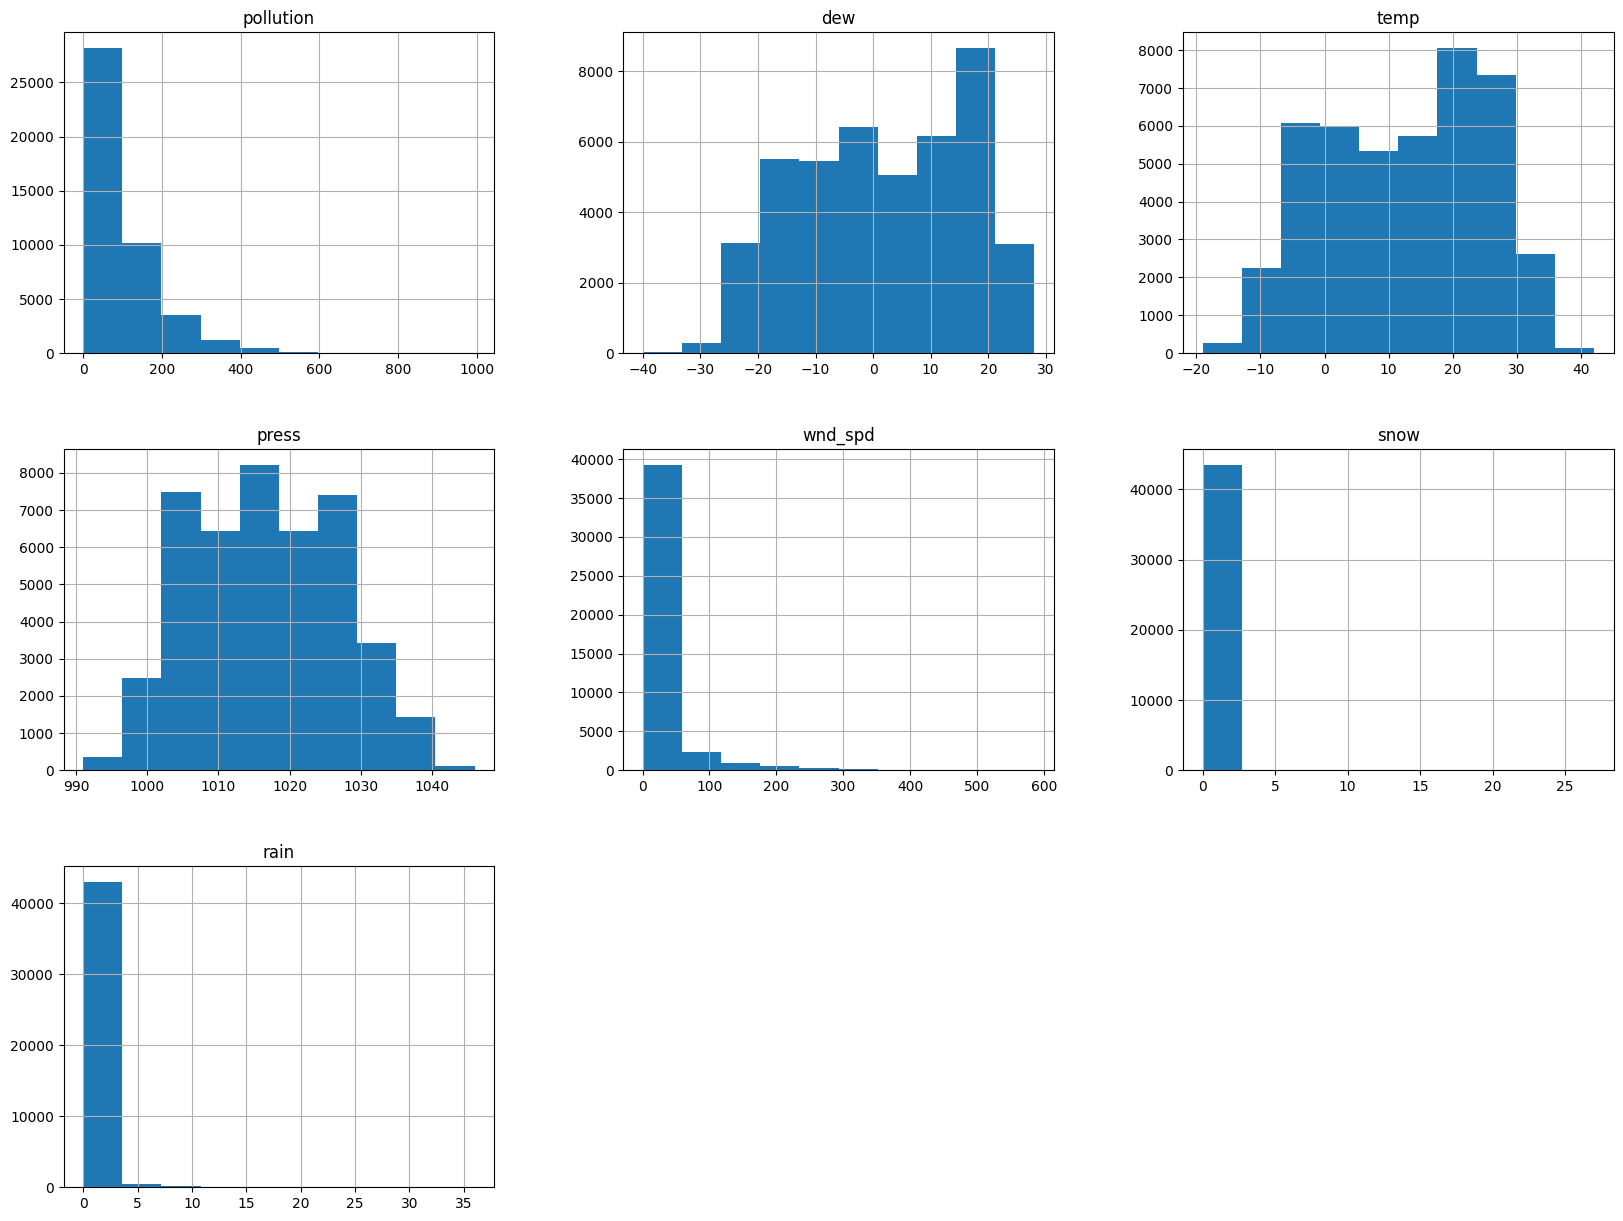

In [26]:
fig, ax = plt.subplots(figsize = (20,15))
df_pollution.hist(ax = ax)
plt.show()

# 2.4 Correlation Matrix


- **Pollution**: Shows a moderate positive correlation with `dew` (0.16) and `rain` (0.22), suggesting that higher pollution levels might be associated with increased dew and rainfall. It has a moderate negative correlation with `temp` (-0.91) and `press` (-0.46), indicating that pollution tends to be higher when temperatures and atmospheric pressure are lower.

- **Dew**: Strongly positively correlated with `temp` (0.82), meaning higher dew points are associated with higher temperatures. It has a strong negative correlation with `press` (-0.78), suggesting that lower pressure is associated with higher dew points.

- **Temperature (temp)**: As noted, it’s strongly correlated with `dew` (0.82) and negatively correlated with `press` (-0.83) and `pollution` (-0.91). This indicates that higher temperatures are associated with higher dew points, lower pressure, and lower pollution levels.

- **Pressure (press)**: Shows strong negative correlations with `dew` (-0.78), `temp` (-0.83), and moderate negative correlations with `pollution` (-0.46), `snow` (-0.69), and `rain` (-0.08). Higher pressure seems to be associated with drier, colder conditions and lower pollution.

- **Wind Speed (wnd_spd)**: Has weak correlations with most variables, with the strongest being a negative correlation with `temp` (-0.15), suggesting that higher wind speeds might occur with lower temperatures.

- **Snow**: Shows a moderate negative correlation with `press` (-0.69) and weak positive correlations with `pollution` (0.22) and `dew` (0.03), indicating that snow events might be more likely with lower pressure and slightly higher pollution.

- **Rain**: Has a weak positive correlation with `pollution` (0.22) and `dew` (0.13), and a very weak negative correlation with `press` (-0.08), suggesting that rainfall might slightly increase with higher pollution and dew but is not strongly tied to pressure.

<Axes: >

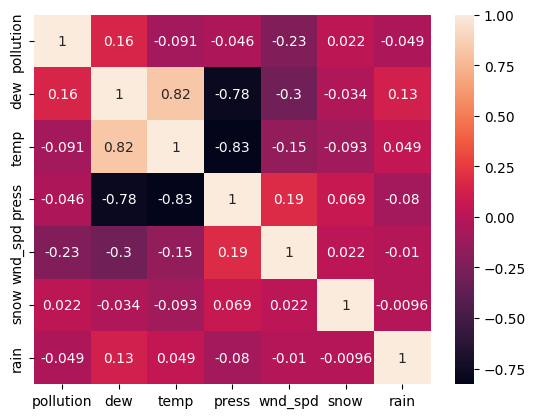

In [27]:
sns.heatmap(df_pollution[num_cols].corr(), annot = True)

## 2.5 Time Series Analysis

These time series plots show environmental variables in Beijing from 2010 to 2015:

- **Pollution**: High variability with frequent spikes above 800, especially in winters (e.g., early 2010, 2012, 2013), indicating seasonal pollution peaks.
- **Dew**: Clear seasonal pattern, peaking at 20°-30° in summers and dropping to -30° in winters, reflecting temperature-driven humidity changes.
- **Temperature (temp)**: Strong seasonal cycle, ranging from -10°C in winters to 30°C in summers, with consistent yearly patterns.
- **Pressure (press)**: Seasonal fluctuations between 990 and 1040 hpa, with higher pressure in winters and lower in summers, inversely related to temperature.
- **Wind Speed (wnd_spd)**: Mostly low, with occasional spikes up to 600 (?), showing no clear seasonal trend but frequent short bursts.
- **Snow**: Rare, with small peaks in winters (e.g., 2010, 2012, 2013), reaching up to 25 cms, consistent with cold seasons.
- **Rain**: Sporadic, with peaks in summers (e.g., 2010, 2012, 2014), reaching up to 35 mms, reflecting monsoon patterns.

### Summary
Seasonal patterns dominate temperature, dew, and pressure, while pollution peaks in winter. Wind speed, snow, and rain are more erratic, with snow and rain tied to specific seasons.

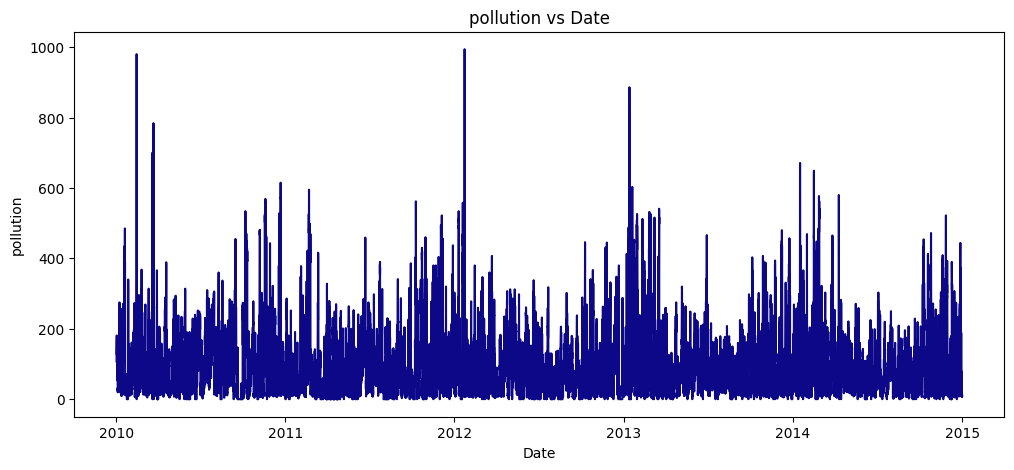

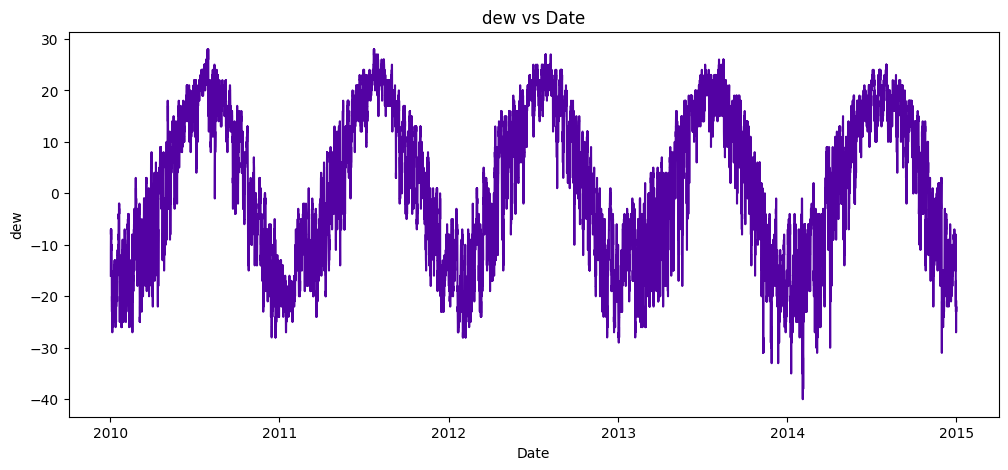

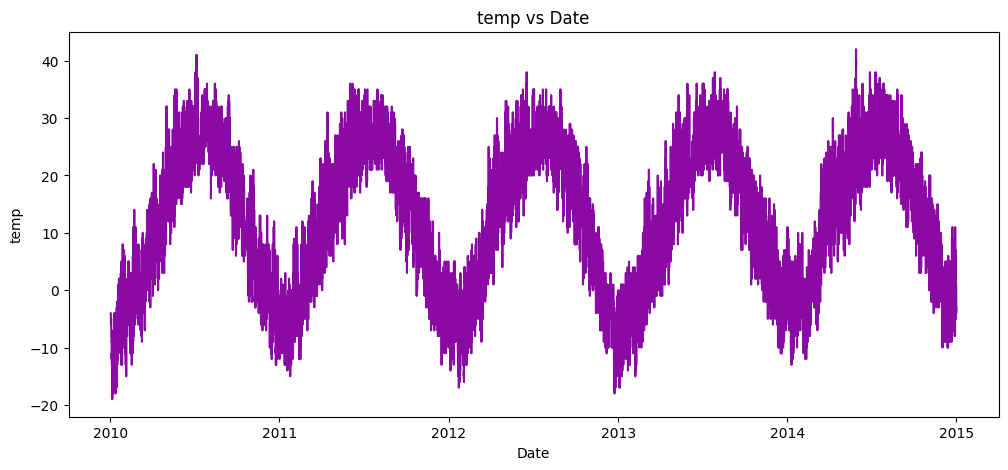

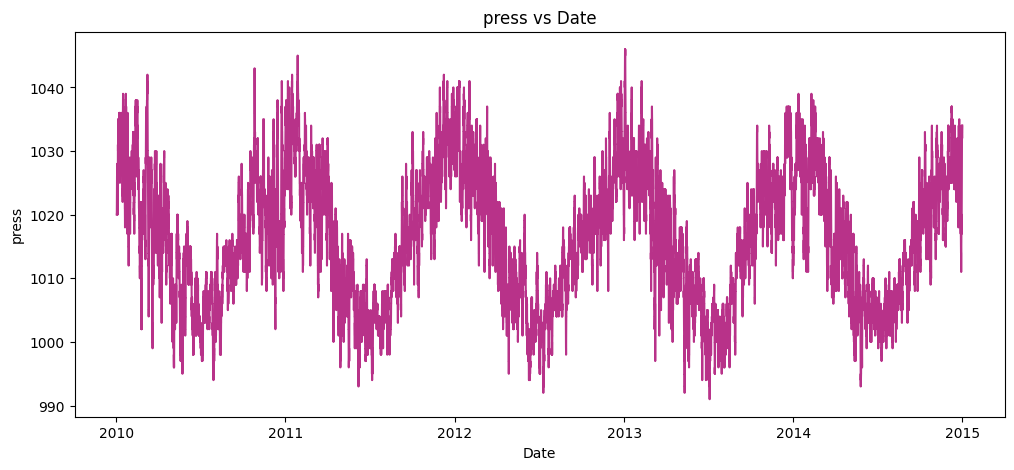

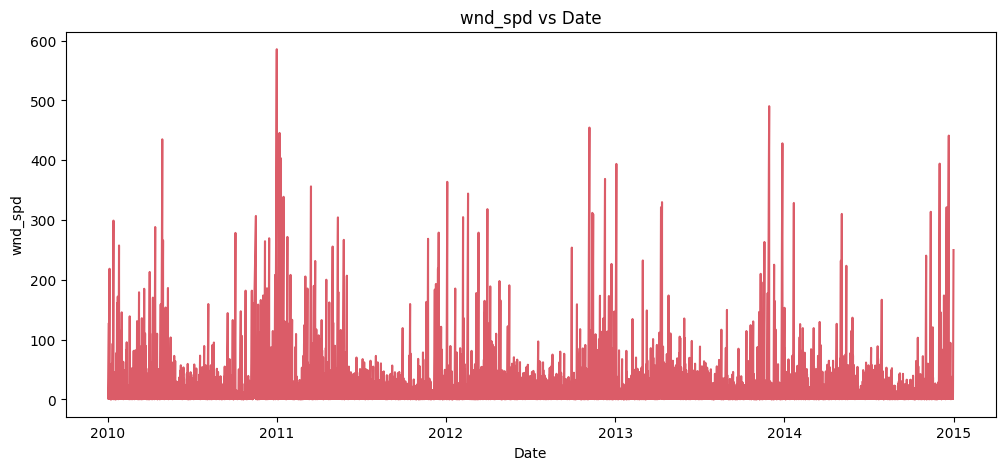

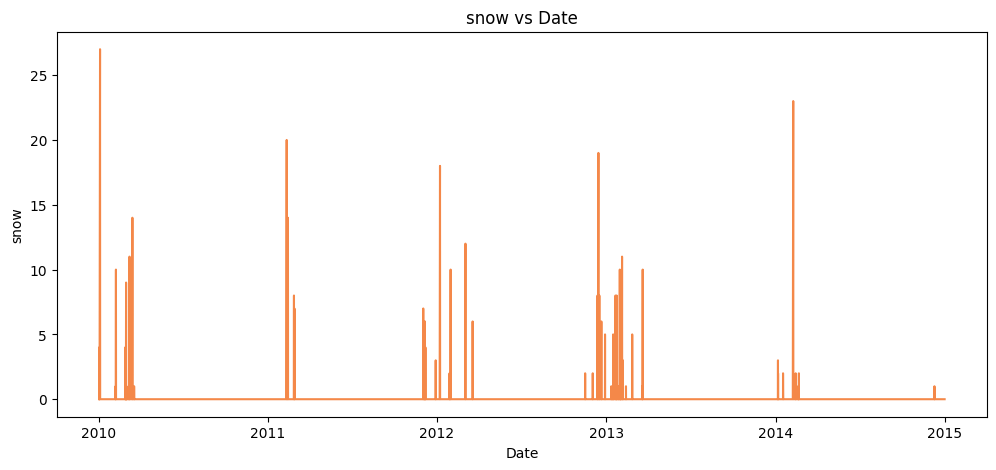

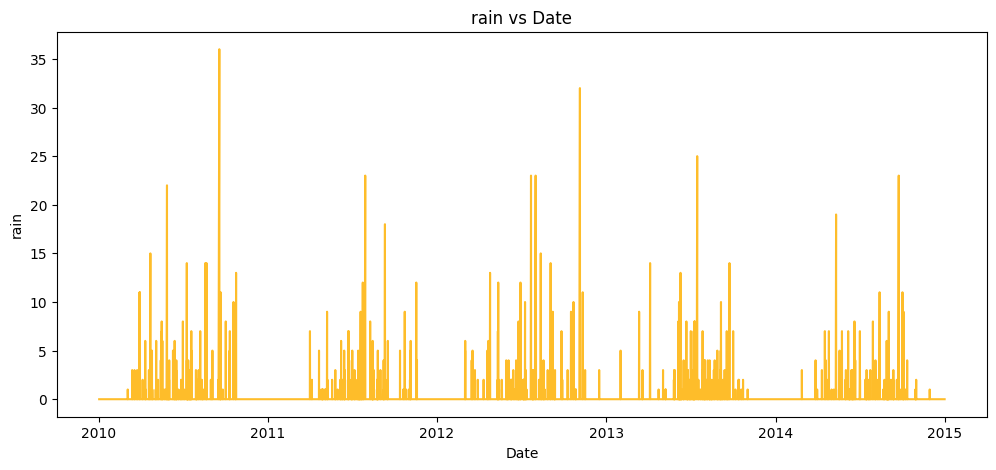

In [28]:
df_num = df_pollution[num_cols]
for i, col in enumerate(num_cols):
    plt.figure(figsize=(12, 5))
    color = cm.plasma(i / len(num_cols))
    plt.plot(df_pollution.index, df_num[col], color=color)
    plt.title(f"{col} vs Date")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()


## 2.6 Pollution Outlier Detection

- **General Trend**: Pollution levels fluctuate between 100 and 500 units, with periodic spikes indicating seasonal or episodic pollution events.
- **Outliers**: Red markers highlight extreme pollution levels exceeding 400-500 units, occurring sporadically across all years (e.g., early 2010, 2011, 2013, 2014). These likely represent significant pollution episodes, possibly linked to industrial activity, weather conditions, or seasonal factors.
- **Seasonal Patterns**: Higher peaks are noticeable in winters (e.g., 2010, 2012, 2013), consistent with the earlier correlation of pollution with lower temperatures and pressure.

### Summary
The plot reveals a baseline pollution level with occasional outliers above 400 units, predominantly in winter months. These outliers suggest periods of heightened pollution, which could be further analyzed alongside wind direction data from your windrose plot to identify potential sources or dispersion patterns.

In [29]:
df_pollution

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [30]:
from scipy.stats import zscore #ind of uneccesary but looks cool

df_daily = df_pollution
#df_daily.set_index('index', inplace = True)
df_daily = df_daily.resample("D").mean(numeric_only=True)
df_daily['pollution_zscore'] = zscore(df_daily["pollution"])
outliers_day = df_daily[df_daily['pollution_zscore'].abs() > 3]


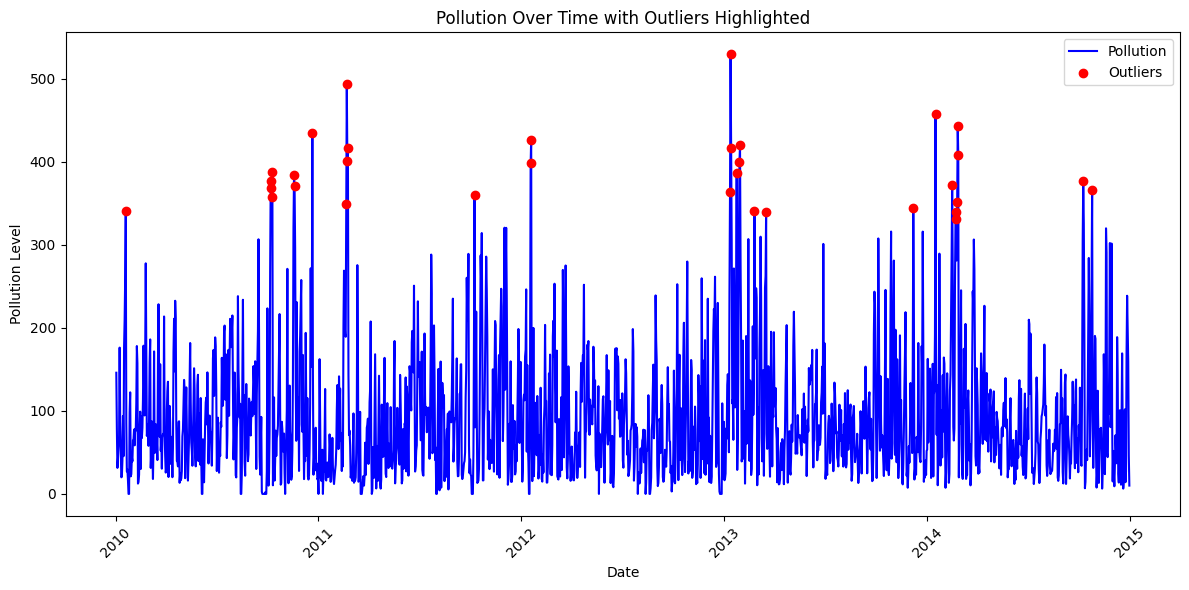

In [31]:

outliers_day.sort_values("pollution_zscore", ascending=False)
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['pollution'], label='Pollution', color='blue')
plt.scatter(outliers_day.index, outliers_day['pollution'], color='red', label='Outliers', zorder=5)
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Pollution Over Time with Outliers Highlighted')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.7 Wind Direction Analysis

These bar plots summarize the total sums of pollution, snow, and rain grouped by wind direction (NE, NW, SE, cv) in Beijing, based on your dataset:

- **Pollution by Wind Direction**: Highest pollution sums are observed with SE (around 1.4 million) and NW (around 1.0 million), indicating these directions may carry more polluted air masses. NE shows a lower sum (around 0.4 million), while cv is moderate (around 1.2 million).

- **Snow by Wind Direction**: SE has the highest snow sum (around 1200 units), followed by NW (around 400 units). NE and cv show lower sums (around 200 units), suggesting SE winds are more associated with snow events.

- **Rain by Wind Direction**: NW has the highest rain sum (around 2500 units), with SE and cv at similar levels (around 1500 units). NE shows the lowest sum (around 1500 units), indicating NW winds may bring more rainfall.

### Summary
SE winds correlate with the highest pollution and snow levels, while NW winds are linked to the most rain. These patterns align with your windrose data, where SE and NW were dominant directions, potentially influencing pollution and precipitation distribution in Beijing.

In [32]:
df_pollution["wnd_dir"].value_counts() #CV - Calm Variable Winds, which are non consisten Wind directions

wnd_dir
SE    15287
NW    14128
cv     9377
NE     4994
Name: count, dtype: int64

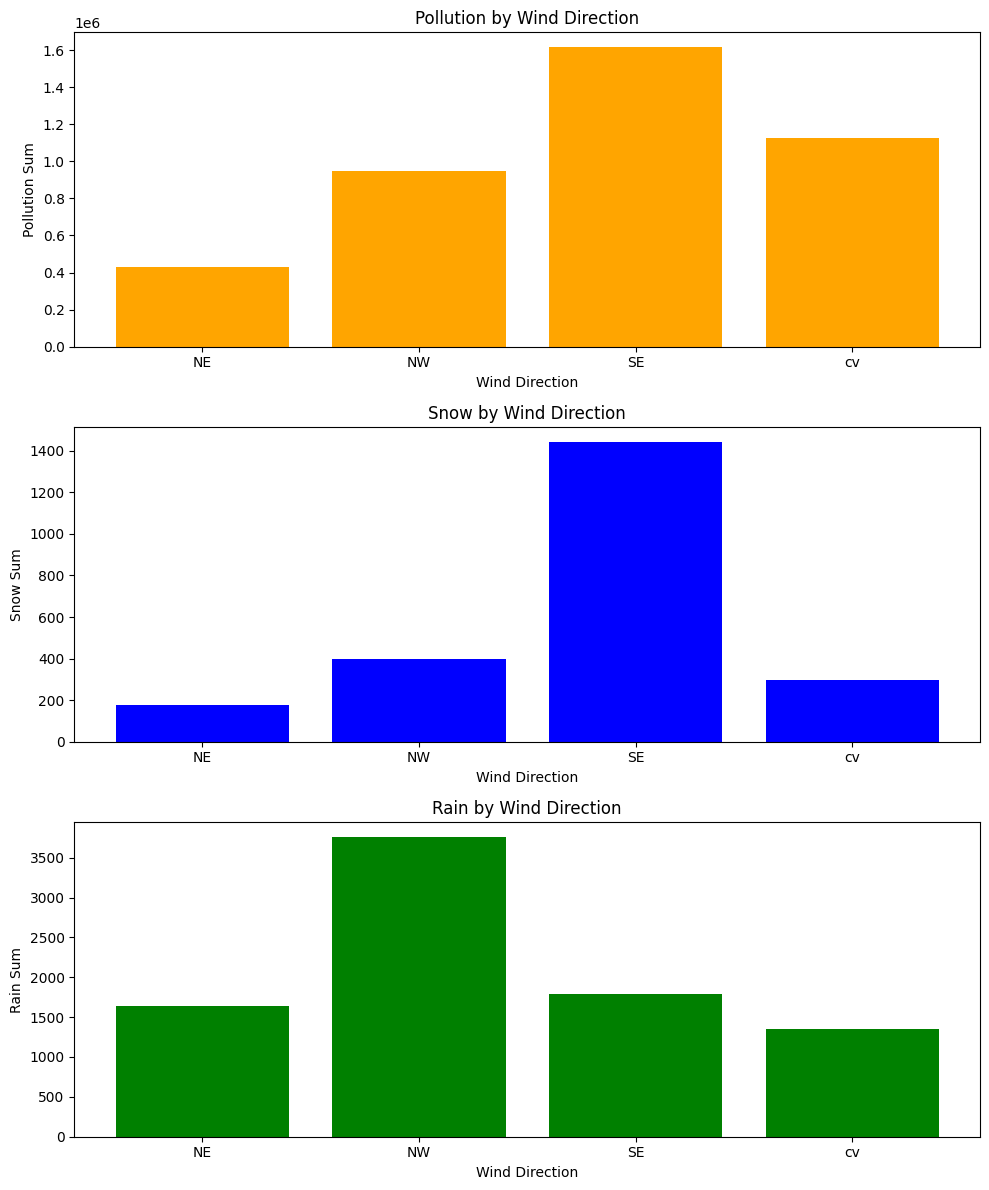

In [33]:
wind_grouped = df_pollution.groupby("wnd_dir").agg({
    "pollution": "sum",
    "snow": "sum",
    "rain": "sum"
})


x = np.arange(len(wind_grouped))  
columns_to_plot = ['pollution', 'snow', 'rain']
titles = ['Pollution by Wind Direction', 'Snow by Wind Direction', 'Rain by Wind Direction']
colors = ['orange', 'blue', 'green']


fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, col in enumerate(columns_to_plot):
    axs[i].bar(x, wind_grouped[col], color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Wind Direction')
    axs[i].set_ylabel(f'{col.capitalize()} Sum')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(wind_grouped.index)


plt.tight_layout()
plt.show()


C:\Users\morit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\windrose\windrose.py:667: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


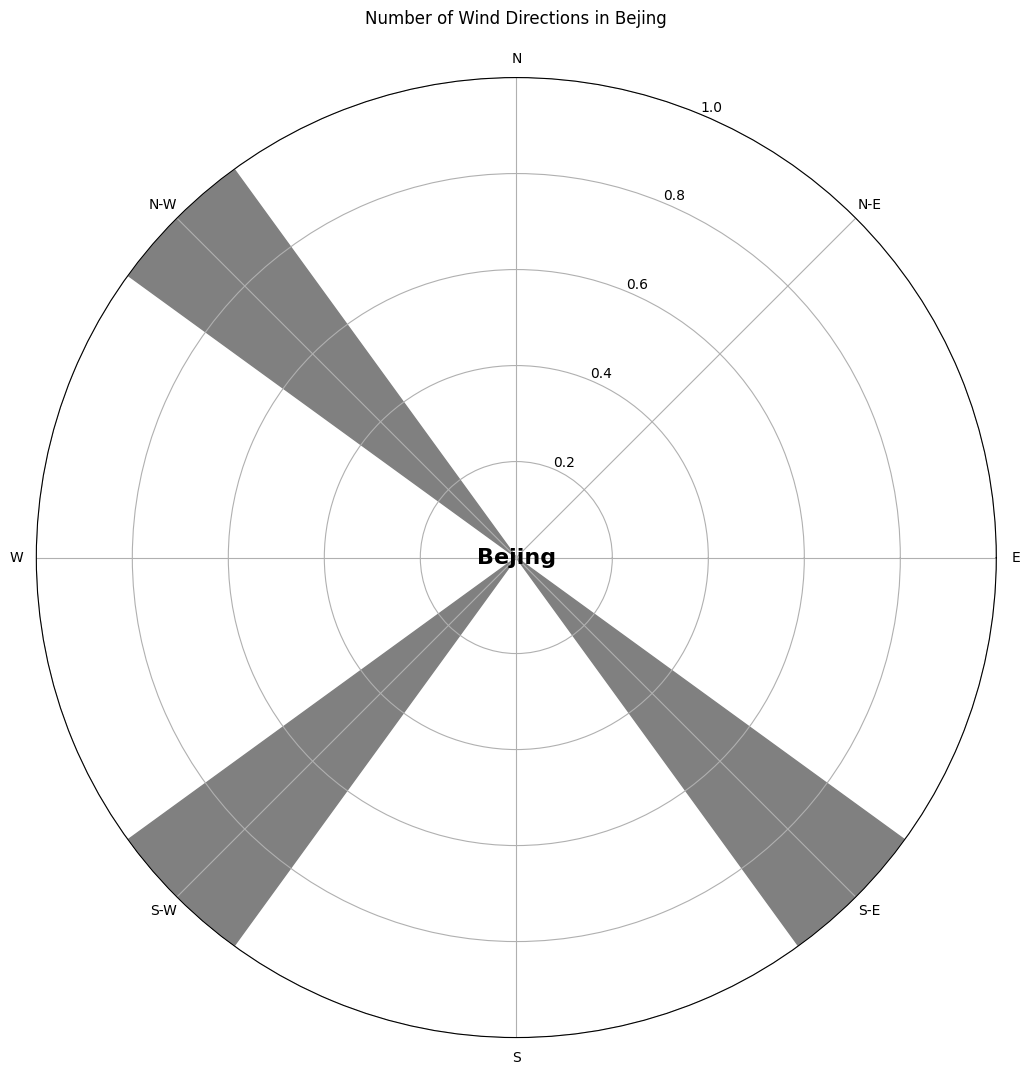

In [45]:
import matplotlib.image as mpimg
from windrose import WindroseAxes

# Load the satellite image (ensure the path is correct)
#img = mpimg.imread(r'notebooks\satelite_image.png')

# Wind direction mapping
direction_mapping = {
    'SE': 135, 'NW': 315, 'cv': None, 'NE': 45  # 'cv' is treated as invalid
}

# Your wind directions and their respective counts
wind_directions = ['SE', 'NW', 'cv', 'NE']
counts = [15290, 14130, 9384, 4996]

# Create dataframe
df_wind = pd.DataFrame({'wind_direction': wind_directions, 'counts': counts})
df_wind['wind_direction_deg'] = df_wind['wind_direction'].map(direction_mapping)

# Drop rows where 'cv' was (invalid direction)
df_wind = df_wind.dropna(subset=['wind_direction_deg'])


# Create the figure
fig = plt.figure(figsize=(12, 12))

# Create background axes for the satellite image
#ax_bg = fig.add_axes([0, 0, 1, 1])
#ax_bg.imshow(img, extent=[-np.pi, np.pi, -np.pi, np.pi], alpha=0.5, aspect='auto')
#ax_bg.axis('off')  # Hide background axes

# Create windrose axes on top with transparent background
ax_wind = WindroseAxes(fig, [0.1, 0.1, 0.8, 0.8], facecolor='none')
fig.add_axes(ax_wind)

# Plot the windrose bars with the normalized counts
ax_wind.bar(np.array(df_wind['wind_direction_deg']), np.array(df_wind['counts']), edgecolor='white', color='gray', opening=0.8, blowto = True)

# Customize the plot
ax_wind.set_title("Number of Wind Directions in Bejing", pad=20)
ax_wind.text(0, 0, 'Bejing', color='black', ha='center', va='center',
             fontsize=16, fontweight='bold')

# Display the plot
plt.show()


# 3. Feature Engineering

## 3.1 Dataset Aggregation

In [46]:
mapping = {'NE': 0, 'SE': 1, 'NW': 2, 'cv': 3}

df_pollution["wnd_dir"] = df_pollution["wnd_dir"].map(mapping)
df_pollution_test["wnd_dir"] = df_pollution_test["wnd_dir"].map(mapping)

In [47]:
aggregation = {
    'pollution': lambda x: round(x.mean(), 2),  # Mean, rounded to 2 decimals
    'dew': lambda x: round(x.mean(), 2),        # Mean, rounded to 2 decimals
    'temp': lambda x: round(x.mean(), 2),       # Mean, rounded to 2 decimals
    'press': lambda x: round(x.mean(), 2),      # Mean, rounded to 2 decimals
    'wnd_dir': lambda x: x.mode()[0],           # Mode, no rounding needed (integer)
    'wnd_spd': lambda x: round(x.mean(), 2),    # Mean, rounded to 2 decimals
    'snow': lambda x: round(x.sum(), 2),        # Sum, rounded to 2 decimals
    'rain': lambda x: round(x.sum(), 2)         # Sum, rounded to 2 decimals
}

df_pollution_daily = df_pollution.resample('D').agg(aggregation)

df_pollution_daily.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02,145.96,-8.50,-5.12,1024.75,1,24.86,17,0
2010-01-03,78.83,-10.12,-8.54,1022.79,1,70.94,340,0
2010-01-04,31.33,-20.88,-11.50,1029.29,2,111.16,0,0
2010-01-05,42.46,-24.58,-14.46,1033.62,2,56.92,0,0
2010-01-06,56.42,-23.71,-12.54,1033.75,0,18.51,0,0


## 3.2 Creating the Dependent

In [48]:
df_pollution["pollution"].describe()

count    43786.000000
mean        94.020006
std         92.261007
min          0.000000
25%         24.000000
50%         68.000000
75%        133.000000
max        994.000000
Name: pollution, dtype: float64

In [49]:
def classify_pollution(value):
    if value < 35:
        return 0 #Low
    elif 35 <= value < 75:
        return 1 # Moderate
    elif 75 <= value < 132.25:
        return 2 # High
    else:  # >= 132.25
        return 3 # Very High

# Apply classification

df_pollution_daily['pollution_class'] = df_pollution_daily['pollution'].apply(classify_pollution)

In [50]:
df_pollution_daily.pollution_class.value_counts()

pollution_class
1    491
2    481
3    427
0    426
Name: count, dtype: int64

## 3.3 Feature Engineering

- ``dew``: was dropped as it was highly correlated with other features
  
- ``temp_press`` was added due to the strong negative correlation
  - For example, high temperatures with low pressure (e.g., warm, stormy conditions) may trap pollutants, while high pressure with low temperatures (e.g., cold, clear days) may disperse them. The product term models this synergistic effect.
  
- ``press_snow``: A moderate negative correlation (-0.69) exists between pressure and snow.
  - Low pressure systems often bring snow, which can coincide with stagnant air that traps pollutants. This interaction term highlights the combined effect of low pressure and snow accumulation on pollution, such as during winter storms where pollutants might accumulate due to reduced air movement.
  

In [51]:
df_pollution_daily.drop("dew", axis = 1, inplace = True)

In [52]:
df_pollution_daily['temp_press'] = df_pollution_daily['temp'] * df_pollution_daily['press']
df_pollution_daily['press_snow'] = df_pollution_daily['press'] * df_pollution_daily['snow']

In [53]:
df_pollution_daily.head()

,pollution,temp,press,wnd_dir,wnd_spd,snow,rain,pollution_class,temp_press,press_snow
date,,,,,,,,,,
2010-01-02,145.96,-5.12,1024.75,1,24.86,17,0,3,-5246.7200,17420.75
2010-01-03,78.83,-8.54,1022.79,1,70.94,340,0,2,-8734.6266,347748.60
2010-01-04,31.33,-11.50,1029.29,2,111.16,0,0,0,-11836.8350,0.00
2010-01-05,42.46,-14.46,1033.62,2,56.92,0,0,1,-14946.1452,0.00
2010-01-06,56.42,-12.54,1033.75,0,18.51,0,0,1,-12963.2250,0.00


## 3.4 Adding Time Effects

- ``DOW`` adding daily time effects (0: Monday, 6: Sunday)
  - Pollution levels differ during the weak, Records start on a Saturday
  
- ``is_weekend`` binary variable that checks wether a day is on the weekend
  - Pollution differs on the weekends, compared to Weekdays

- ``Season`` the overall weather depends on the season, and the pollution depends on the season
  - 0 = Winter, 1 = Spring, 2 = Summer and 3 = Autumn

In [54]:
df_pollution_daily["DOW"] = df_pollution_daily.index.dayofweek #Day of Week
df_pollution_daily['is_weekend'] = df_pollution_daily['DOW'].isin([5, 6]).astype(int) #Weekend

In [55]:
def get_season(month):
    if month in [12, 1, 2]:
        return 0 #'Winter'
    elif month in [3, 4, 5]:
        return 1 #'Spring'
    elif month in [6, 7, 8]:
        return 2 #'Summer'
    else:  # 9, 10, 11
        return 3 #'Fall'

df_pollution_daily["month"] = df_pollution_daily.index.month
df_pollution_daily["Season"] = df_pollution_daily["month"].apply(get_season)
df_pollution_daily.drop("month", axis = 1, inplace = True)

# 4. Modelling
## 4.1 SOFTMAX Regression - Baseline


### Key Predicitons
- As the SOFTMAX Regression is a Baseline Model, it was primariliy used to identify which features to select, and which methods could be used on further Models

1. **Most Important Features:**
   - `wnd_dir_1` (North East) , `press`, `wnd_dir_3` (Cumulative Wind), and `wnd_spd` are the most influential features, suggesting that **wind direction, speed, and pressure** are critical for predictions.
   - `temp` and `Season_2` (Spring) also have high importance, indicating that **temperature and seasonality significantly impact the outcome.**

2. **Moderate Importance:**
   - Features such as `temp_press`, `Season_1` (Winter), and `press_snow` contribute to the model but to a lesser extent.
   - These may still be relevant but not as dominant as the top features.

3. **Least Important Features:**
   - `DOW_2`, `DOW_5`, and `is_weekend_1` show the **lowest importance**, suggesting that **day-of-the-week effects and weekend status have minimal influence** on predictions.

### Suggestions

- **Remove Irrelevant Features:** Exclude unnecessary columns (such as the Day of the Week, if not relevant to the target variable) to reduce noise and improve model performance.

- **Dimensionality Reduction with PCA:** Apply Principal Component Analysis (PCA) to reduce the dimensionality of the feature space while retaining important variance. This could help simplify the model and improve its performance by eliminating multicollinearity.

- **Address Class Imbalance:** Consider using SMOTE (Synthetic Minority Over-sampling Technique) for oversampling the minority classes, or alternatively, apply class-weight adjustments in models like Random Forest to balance the class distribution and improve model accuracy, especially for underrepresented categories.

- **Hyperparameter Tuning:** Perform hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) to optimize the performance of your model, especially for Random Forests or other tree-based algorithms. This could help improve both accuracy and robustness by identifying the best combination of parameters.

In [56]:
numeric_cols = ['temp', 'press', 'wnd_spd', 'snow', 'rain', 
                'temp_press', 'press_snow']
categorical_cols = ['Season', 'wnd_dir', 'is_weekend', "DOW"]

In [57]:
df_categorical = pd.get_dummies(df_pollution_daily[categorical_cols], columns=categorical_cols, drop_first=True)

X = pd.concat([df_pollution_daily[numeric_cols], df_categorical], axis=1)
y = df_pollution_daily['pollution_class']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Cross-Validation Accuracy Scores: [0.6877447  0.66377879 0.70623572 0.6935167  0.70100272]
Mean Accuracy: 0.6905 ± 0.0148
Test Accuracy: 0.4301

Classification Report:
              precision    recall  f1-score   support

         Low       0.53      0.68      0.60        78
    Moderate       0.39      0.20      0.26       105
        High       0.40      0.41      0.40       103
   Very High       0.39      0.52      0.45        79

    accuracy                           0.43       365
   macro avg       0.43      0.45      0.43       365
weighted avg       0.42      0.43      0.41       365


Confusion Matrix:


<Axes: >

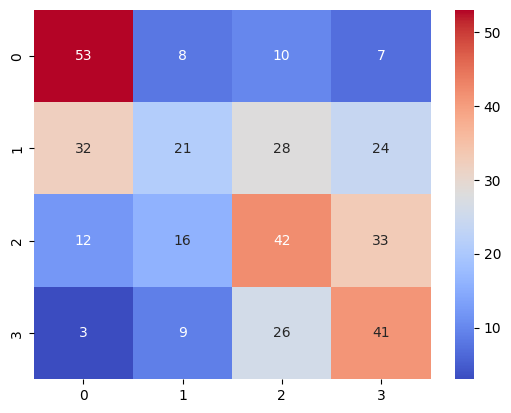

In [59]:
softmax_model = LogisticRegression(solver='liblinear', random_state=42, penalty = 'l1')

# Step 2: Perform Cross-Validation
cv_scores = cross_val_score(softmax_model, X_train_scaled, y_train, cv=5, scoring='roc_auc_ovo')  # 5-fold CV

# Print cross-validation accuracy
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Step 3: Train the model on the full training data
softmax_model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate on test data
y_pred = softmax_model.predict(X_test_scaled)
y_pred_proba = softmax_model.predict_proba(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Moderate', 'High', 'Very High']))

# Confusion matrix
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="coolwarm")


Overall AUC-ROC Score: 0.7167


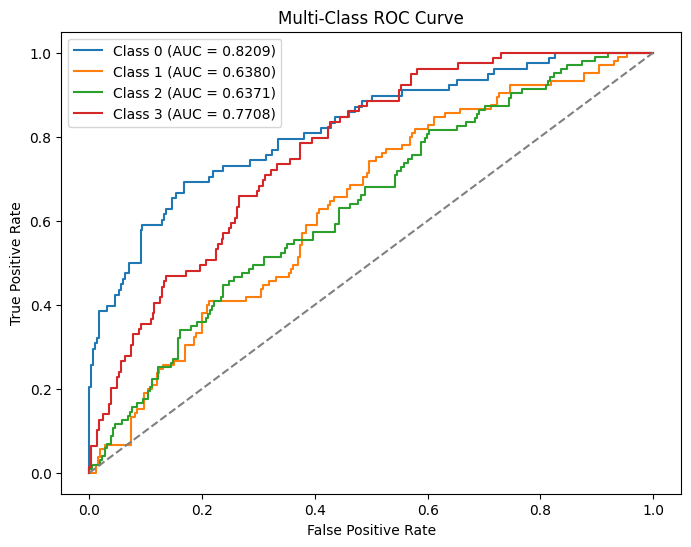

In [60]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust class labels if necessary
n_classes = y_test_binarized.shape[1]

auc_scores = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr")
print(f"\nOverall AUC-ROC Score: {auc_scores:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.4f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

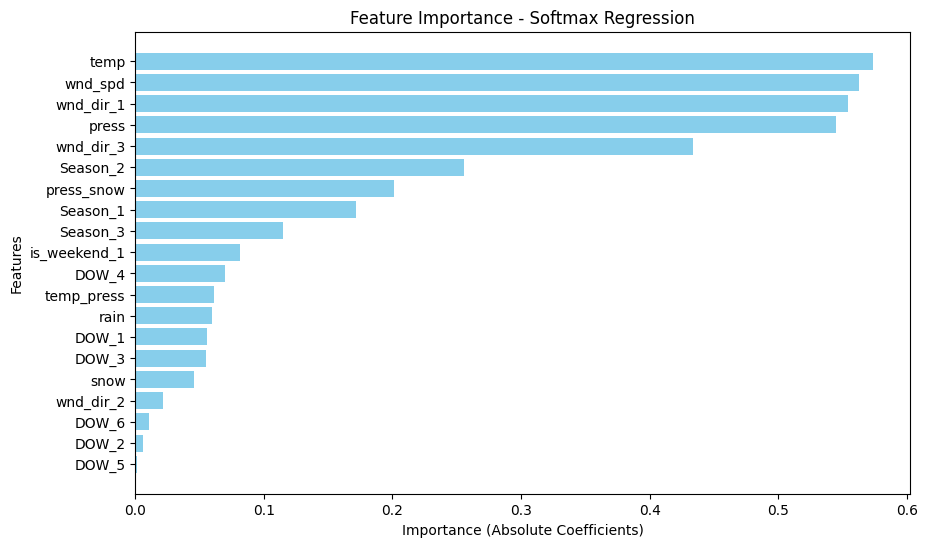

In [61]:
feature_importance = np.abs(softmax_model.coef_).mean(axis=0)  # Average across classes

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance (Absolute Coefficients)")
plt.ylabel("Features")
plt.title("Feature Importance - Softmax Regression")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()